# The EBRAINS Knowledge Graph​

### Extended tutorial 

Alix E.Bonard, Laura Morel, Peyman Najafi and Andrew P. Davison 

NeuroSPI Paris-Saclay Institute of Neuroscience , CNRS, Université Paris-Saclay, France.


### Table of contents: 

Hands-on case study: Figure reproduction with and without metada 
-  
- Explore the datafile 
- Reproduce the figure 4C from [The microcircuits of striatum in silico. Proceedings of the National Academy of Sciences](https://www.pnas.org/doi/full/10.1073/pnas.2000671117)  without metadata
- Reproduce the same figure 4C with metadata

Hands-on a learning resource: Salgueiro-Peirera-Marie-2018 (optional)
- Explore the KG Search to find a dataset with fairgraph queries find the Salgueiro Pererra Marie case study 
- Follow the case study 




## Introduction

This tutorial is the continuation of the tutorial EBRAINS Knowledge Graph introductory. Please see this tutorial before going throught this jupyter notebook.
In the previous tutorial, you learnt how to search, retrieve and download datasets and metadata. 
The aim of this tutorial is to show how to reuse data with in-depth metadata. This aim follows the FAIR principle of Reusability. Therefore, you will learn how to use in-depth metadata in the frame of data reuse by reproducing figure with and without metadata. you will also be introduce to the package Neo since this tutorial focus on electrophysiological dataset specifically whole cell patch clamp datasets.

**Reusability principle - According to  the GO FAIR Foundation:**

*"The ultimate goal of FAIR is to optimise the reuse of data. To achieve this, metadata and data should be well-described so that they can be replicated and/or combined in different settings.*

*R1. (Meta)data are richly described with a plurality of accurate and relevant attributes*

*R1.1. (Meta)data are released with a clear and accessible data usage license*

*R1.2. (Meta)data are associated with detailed provenance*

*R1.3. (Meta)data meet domain-relevant community standards"*


Most of the exercises are made to be done in autonomy.
For the EBRAINS users day, tutors suggest to do this tutorial in pairs.



## 1. Finding a dataset with fairgraph queries

### **Authentication / authorization**


As presented in the tutorial_EBRAINS_Knowledge_Graoh_extended.ipynb, you need a kg_client to access retrieve information from the EBRAINS KG 

1. #### kg_client with: JupyterLab 

In [2]:
from fairgraph import KGClient

kg_client = KGClient(host="core.kg.ebrains.eu", token=clb_oauth.get_token()) # if you want to have access to your EBRAINS token `token=clb_oauth.get_token()`

2. #### kg_client with: Local system

You can have access to your token in the [KG Editor](https://editor.kg.ebrains.eu/) in your profile button (copy token to clipboard)

In [ ]:
# in a local terminal: 

# cd <folder where the tutorial is> # change the directory where the tutorial file is saved.
# export KG_AUTH_TOKEN=<paste the token> (e.g. 'eyJhbGci...nPq') 
# 

! pip install fairgraph # to install fairgraph in your python environment 

# in your jupyter notebook:

from fairgraph import KGClient
import os 

#kg_token = os.environ['KG_AUTH_TOKEN'] 
#kg_client = KGClient(host="core.kg.ebrains.eu",token=kg_token) 

# alternative approach 1:
# run in an another cell - get the token everytime you need 
# kg_token = KGClient(host='core.kg.ebrains.eu').user_info()

# alternative approach 2: 
# copy your token from the KG Editor directly in the jupyter notebook as below
kg_token = "eyJ...og"
kg_client = KGClient(host="core.kg.ebrains.eu",token=kg_token) 


### **Fairgraph Query**

You need to retrieve a dataset related to striatal interneurons with low spiking threshold with `DatasetVersion.list`

In [ ]:
"Paste your code here"

### **Download the dataset**

To be able to use the dataset, you need to download it. You can use the property `download` of DatasetVersion. Don't forget to use follow_links to retrieve the dataset files. 

In [ ]:
"Paste your code here"



with zipfile.ZipFile(dataset_path, "r") as z:
    z.extractall("downloads")

### **Checking the dataset** - Solution

Run the following cell to check the dataset and to download it. 

In [3]:
import os
import sys
sys.path.insert(0, os.path.join(os.getcwd(), ".local"))


In [4]:
import fairgraph.openminds.core as omcore
import logging
import warnings
import zipfile

dataset_version_doi = "past the dataset DOI"

dataset_versions = omcore.DatasetVersion.list(
    kg_client, 
    digital_identifier__identifier=dataset_version_doi,
    follow_links={"repository": {"files": {}}},
    scope="any"
)

assert len(dataset_versions) == 1  # check: the DOI should be for a single, specific version of the dataset
dataset_version = dataset_versions[0]

# check we have the correct version of the dataset
assert dataset_version.full_name == "Electrophysiological recordings of striatal low threshold-spiking interneuron"
assert dataset_version.version_identifier == "v1"

if not os.path.exists("downloads"):  # only download the dataset if it hasn't been downloaded previously
    dataset_path = dataset_version.download("downloads", kg_client, accept_terms_of_use=True)[0]
else:
    dataset_path = "downloads/hbp-d000007_LTS-ephys_pub.zip"
with zipfile.ZipFile(dataset_path, "r") as z:
    z.extractall("downloads")

Cannot yet handle case where self.path is a list: Property(name='describes', types=(<class 'fairgraph.openminds.core.research.behavioral_protocol.BehavioralProtocol'>, <class 'fairgraph.openminds.core.research.protocol.Protocol'>, <class 'fairgraph.openminds.ephys.device.electrode_array_usage.ElectrodeArrayUsage'>, <class 'fairgraph.openminds.ephys.device.electrode_usage.ElectrodeUsage'>, <class 'fairgraph.openminds.ephys.device.pipette_usage.PipetteUsage'>, <class 'fairgraph.openminds.specimen_prep.device.slicing_device_usage.SlicingDeviceUsage'>), path='['^vocab:describedIn', '^vocab:metadataLocation']', required=False, multiple=True)
/opt/conda/lib/python3.8/site-packages/fairgraph/properties.py:373: UserWarning: Mixed types in Property(name='is_location_of', types=(<class 'fairgraph.openminds.ephys.entity.recording.Recording'>, <class 'fairgraph.openminds.sands.atlas.parcellation_terminology_version.ParcellationTerminologyVersion'>), path='^vocab:dataLocation', required=False, mult

NameError: name 'zipfile' is not defined


## 2. Exploring and visualizing the data

### **Exploring the retrieve dataset**

The zip file contains 2 datasets: 2019Q3/lts and 2019Q3_NWB/lts. In the following analysis, you will be focusing on the 2019Q3/lts dataset.

The dataset contains a number of files with two extensions: *.dat and *.pxp. Original single cell recordings can be find in the folder named original and pre-analazed recordings can be find in the folder named derived. For more information about the folder structure of the dataset see DATA REGISTRY in the Data Descriptor.

This dataset corresponds to the experimental results of the Figure 4 of Hjorth et al.2020. One cell is considered. We know from the dataset metadata that these are electrophysiology data, and more specifically that they were obtained with the whole cell patch clamp technique in current clamp mode. For the other figures in the article, the authors provided jupyter notebooks allowing global visualization of the differents current clamp protocols and the relation between currents and membrane potential or frequencies. We will adapt these global analysis to this dataset.

First, let's read the first three files:

Thanks to the Data Descriptor, we know that the dataset contains two types of files corresponding to currents recording (channel 2) and membrane potential (voltage) recording (channel 3). The prefix can be find directly in the filename. The liquid_junction_potential estimated at 9.5mV has to be subtracted for the analysis.


**Exercise**: Explore the data descriptor to understand the dataset structure 

Run the following cells: 

Initialization

In [9]:
%matplotlib inline

path = 'downloads/2019Q3/lts/derived/Experiment-9862'
prefix = 'ECalllong'
channels = {'current': 2, 'voltage': 3}
liquid_junction_potential = 9.5

This function is adapted from the authors folder analysis. The aim is to plot traces by linking the current and membrane potential files corresponding to channel 2 and 3. These channels are initialized above 

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_traces(path, prefix, protocol, channels, recordings,
                vshift=0, title=None, figsize=(12, 8)):

    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=figsize)
    ax1.set_ylabel('Voltage (mV)')
    ax2.set_ylabel('Current (pA)')
    ax2.set_xlabel('Time (ms)')
    if not title:
        title = protocol
    fig.suptitle(title)
    if len(recordings) > 1:
        # set the colors
        color_cycle = [plt.cm.Blues(i) 
                       for i in np.linspace(0.3, 1, len(recordings))**2]
        ax1.set_prop_cycle('color', color_cycle)
        ax2.set_prop_cycle('color', color_cycle)


    for rec in reversed(recordings):

        # retrieve the file path for the current
        fullname = path + '/' + prefix + '_' + protocol \
            + '_ch' + str(channels['current']) + '_' + str(rec) + '.dat'

        # retrieve the time current and current data
        data = np.loadtxt(fullname)
        time = data[:, 0]
        current = data[:, 1]

        # retrieve the file path for the membrane potential 
        fullname = path + '/' + prefix + '_' + protocol \
            + '_ch' + str(channels['voltage']) + '_' + str(rec) + '.dat'
        
        # retrieve the membrane potential data (i.e. voltage)
        data = np.loadtxt(fullname)
        voltage = data[:, 1] - vshift

        # plot the data
        ax1.plot(time, voltage)
        ax2.plot(time, current)
        
    return fig



In addition to path and prefix defined above, "plot_traces" function takes as arguments:

    protocol: indicated in the filename, in this case 'IV'
    repetitions: correspond to the number indicated in the filename
    title: feature_protocol indicating the protocol vizualized, can be the string as protocol.



Run the following code and compare with the Figure article. Can you isolate the traces used in the Figure 4B? 

In [84]:
![image]("Figure4B.png") 

/bin/bash: -c: line 0: syntax error near unexpected token `"Figure4B.png"'
/bin/bash: -c: line 0: `[image]("Figure4B.png")'


In [ ]:
import matplotlib.pyplot as plt

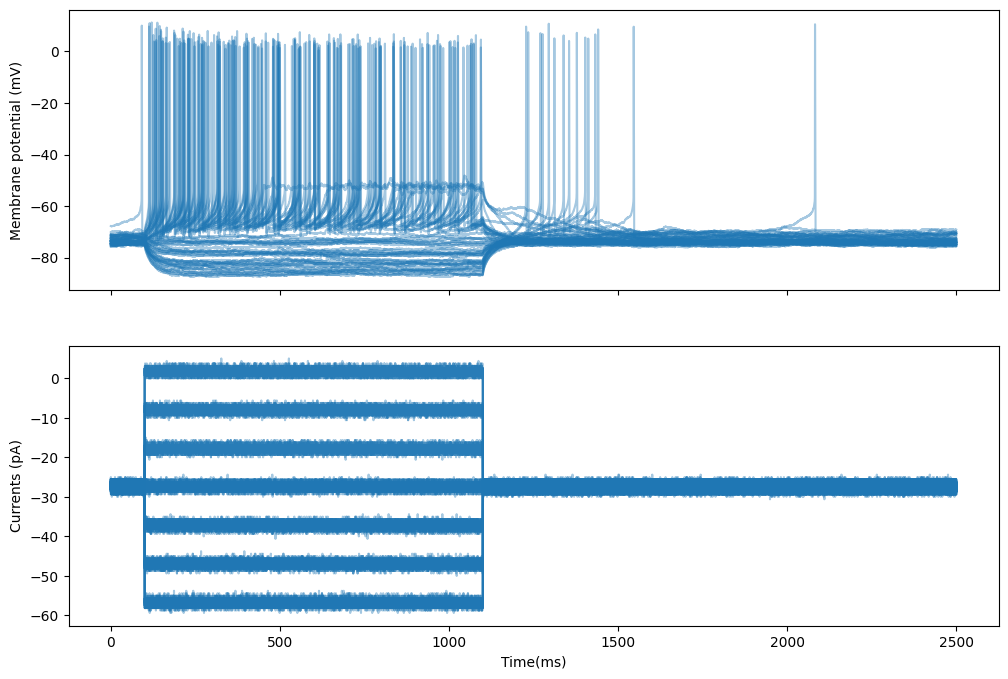

In [43]:
import os 

filename_list = os.listdir('downloads/2019Q3/lts/derived/Experiment-9862')
repetitions = list(np.unique([int(name.split('_')[-1].split('.')[0]) for name in filename_list])) # gets  the repetition number in filenames
protocol = 'IV'
vshift = 9.5

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,8))
ax1.set_ylabel('Voltage (mV)')
ax2.set_ylabel('Current (pA)')
ax2.set_xlabel('Time (ms)')


for rec in repetitions:
    fullname = path + '/' + prefix + '_' + protocol \
        + '_ch' + str(channels['current']) + '_' + str(rec) + '.dat'
    data = np.loadtxt(fullname)
    time = data[:, 0]
    current = data[:, 1]

    fullname = path + '/' + prefix + '_' + protocol \
        + '_ch' + str(channels['voltage']) + '_' + str(rec) + '.dat'
    data = np.loadtxt(fullname)
    voltage = data[:, 1] - vshift
    ax1.plot(time, voltage, color='tab:blue', alpha=0.4)
    ax2.plot(time, current, color='tab:blue', alpha=0.4)
    ax1.set_ylabel('Membrane potential (mV)')
    ax2.set_ylabel('Currents (pA)')
    ax2.set_xlabel('Time(ms)')

plt.show()

The answer to the previous question should be no. Without clear indications it is almost impossible to reproduce the exact figure quickly. To be able to identify traces used in the figure you need to analyse it one by one which is time consuming 

With the enrich metadata, you can avoid this problem. Explicitly indicating files used in figures articles in metadata is a solution.\
The authors used folling files: 

- ECalllong_IV_ch2_699.dat
- ECalllong_IV_ch2_700.dat
- ECalllong_IV_ch2_701.dat
- ECalllong_IV_ch2_701.dat
- ECalllong_IV_ch3_699.dat
- ECalllong_IV_ch3_700.dat
- ECalllong_IV_ch3_701.dat
- ECalllong_IV_ch2_716.dat

Let's have a look: 

**Exercice**: Modify the code below in order to reproduce the Figure 4B. 

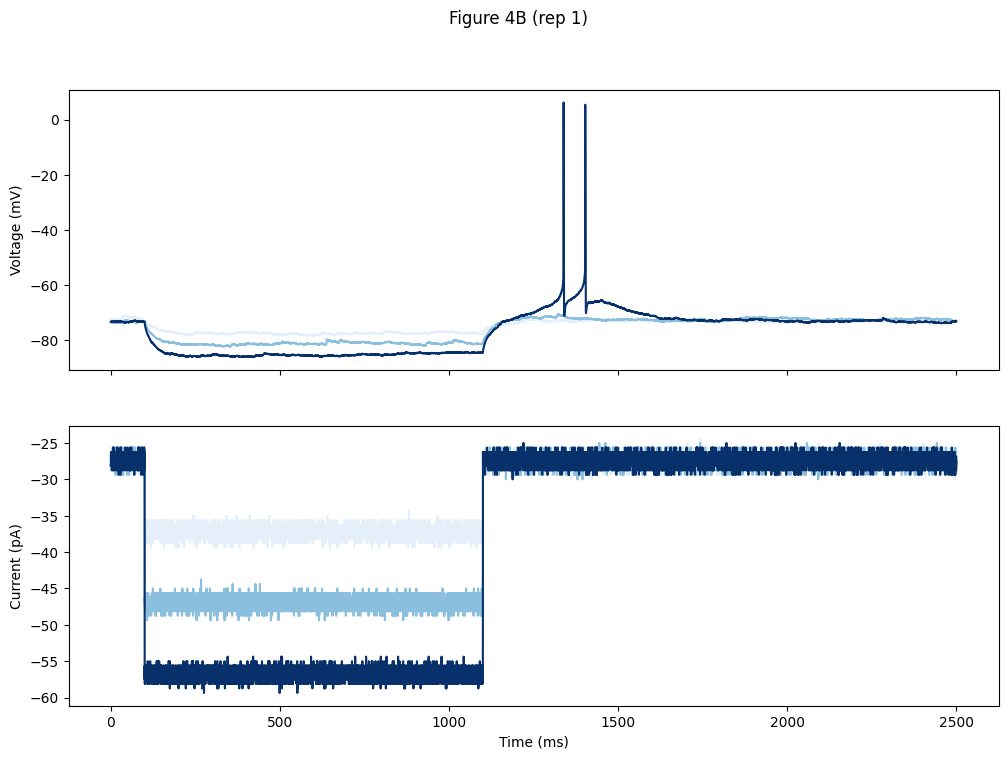

In [44]:
protocol = 'IV'
feature_protocol = 'Figure 4B'
repetitions = [[657,658,659]] # corresponding to ECalllong_IV_ch2_657.dat, ECalllong_IV_ch2_658.dat, ECalllong_IV_ch2_659.dat
vshift=liquid_junction_potential

for recordings in repetitions[0:1]:
    fig = plot_traces(path, prefix, protocol, channels, recordings, 
                      title=feature_protocol + ' (rep %d)' % len(repetitions),
                     vshift=liquid_junction_potential)

The following code is a acurate version of Figure 4B

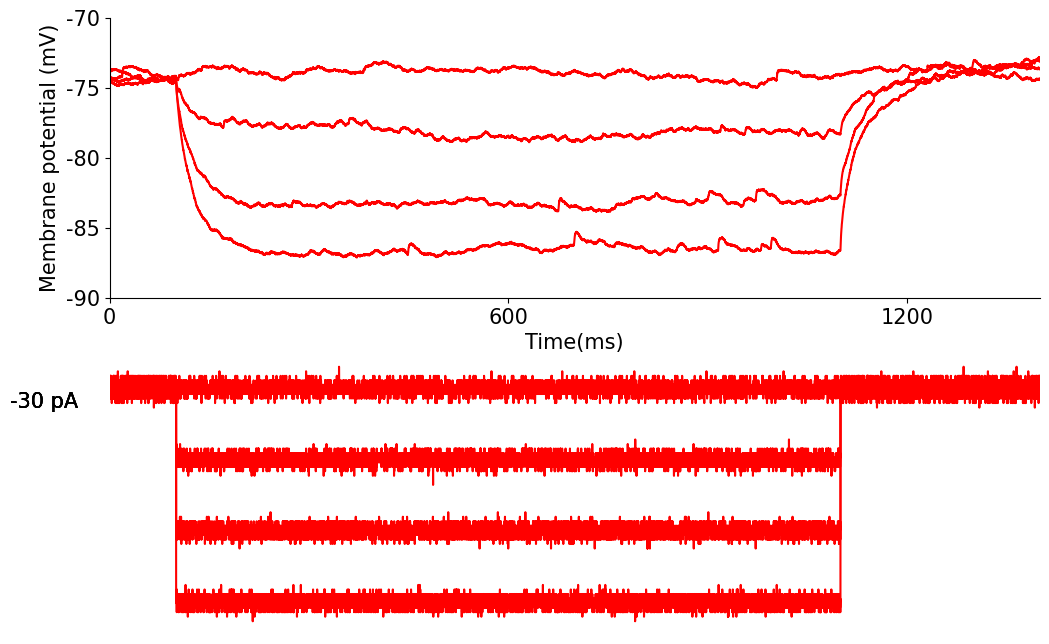

In [45]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(12, 8))

repetitions = [699,700,701,716]

for rec in repetitions:
    fullname = path + '/' + prefix + '_' + protocol \
        + '_ch' + str(channels['current']) + '_' + str(rec) + '.dat'
    data = np.loadtxt(fullname)
    time = data[:, 0]
    current = data[:, 1]
    fullname = path + '/' + prefix + '_' + protocol \
        + '_ch' + str(channels['voltage']) + '_' + str(rec) + '.dat'
    data = np.loadtxt(fullname)
    voltage = data[:, 1] - vshift

    ax1.plot(time, voltage, color='r')
    ax2.plot(time, current, color='r')

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_ylim(-90,-70)
    ax1.set_xlim(0,1400)
    ax1.set_xticks([0, 600, 1200])
    ax1.set_xticklabels(['0', '600', '1200'], size = 15)
    ax1.set_yticks([-70, -75, -80, -85, -90])
    ax1.set_yticklabels(['-70', '-75', '-80', '-85', '-90'], size = 15)
    ax1.set_xlabel('Time(ms)', size = 15, loc='center')
    ax1.set_ylabel('Membrane potential (mV)', size = 15)


    ax2.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.text(-150, -30, r'-30 pA', size = 15) 
    ax2.set_xlim(0,1400)

plt.show()

### **Reproducing figure without metadata**

Now, let's see how you can reproduce a more complex figure. 

In [85]:
![image]("Figure4C.png") 

/bin/bash: -c: line 0: syntax error near unexpected token `"Figure4C.png"'
/bin/bash: -c: line 0: `[image]("Figure4C.png")'



#### Figure 4C




In order to reproduce this figure, you need to know the current amplitudes and the corresponding membrane potential. It is not indicated. How can you find these information? 

**Exercise**: Modify the following code to find the current amplitudes 

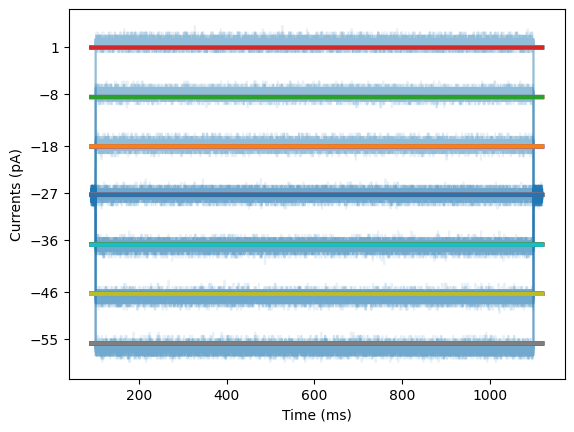

In [58]:
# Part 1:
from math import ceil

repetitions = list(np.unique([int(name.split('_')[-1].split('.')[0]) for name in filename_list]))
l1 = []
l1_current_value = []

for rec in repetitions:
    fullname = path + '/' + prefix + '_' + protocol\
    + '_ch' + str(channels['current']) + '_' + str(rec) + '.dat'
    data = np.loadtxt(fullname)
    
    time = data[:, 0][900:11200]
    current = data[:, 1][900:11200]
    
    # find the current values
    ...
    ...
    ...
    
    l1.append(mean_ceil)
    l1_current_value = list(np.unique(l1))

    plt.plot(time,current, 'tab:blue', alpha=0.1, zorder = 1)
    plt.plot(time,mean_y, linewidth = 3, zorder = 2)
    plt.yticks(l1_current_value)
    plt.xlabel('Time (ms)')
    plt.ylabel('Currents (pA)')

In [ ]:
# Solution: 

mean_y = [np.mean(current)] * len(time)
mean_ceil = ceil(mean_y[0])


Now that the current amplitudes values are known. You must retrieve the corresponding membrane potential files.The following code creates a dictionary. Keys are current amplitudes values index (0 corresponds to 1, 1 corresponds to -8, 2 corresponds to -27 ...) and values are membrane potential values

In [ ]:
# Part 2:
VI = {}
for index in range(0,len(np.unique(l1_current_value))):
    VI[f'{index}'] =[] # index correspond

for rec in repetitions:
    for index in range(0,len(l1_current_value)):
        fullname_current = path + '/' + prefix + '_' + protocol\
        + '_ch' + str(channels['current']) + '_' + str(rec) + '.dat'
        fullname_voltage = path + '/' + prefix + '_' + protocol\
        + '_ch' + str(channels['voltage']) + '_' + str(rec) + '.dat'

        data_current = np.loadtxt(fullname_current)
        time = data_current[:, 0][900:11200]
        current = data_current[:, 1][900:11200]
        
        data_voltage = np.loadtxt(fullname_voltage)
        voltage = data_voltage[:, 1][900:11200]- liquid_junction_potential

        mean = np.mean(current)
        mean_ceil = ceil(mean)
        if mean_ceil == l1_current_value[index]:
            VI[f'{index}'].append(voltage)

To understand it better. You can visualised the number of membrane potential traces corresponding to a current amplitude in the all dataset. 

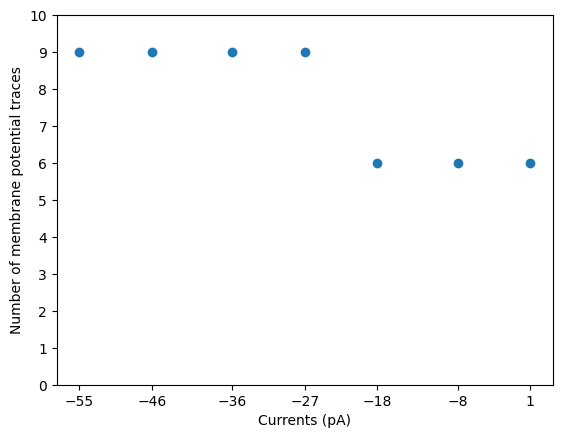

In [60]:
 # Part 3:
values_VI = {}
for keys in VI.keys():
    values_VI[f'{keys}'] =[]

    for k in range(0,len(VI[keys])):
        values_VI[f'{keys}'].append(VI[keys][k])
for i in range(0,len(l1_current_value)):
    plt.scatter(l1_current_value[i], len(values_VI[str(i)]), color='tab:blue')
    plt.ylim(0,10)
    plt.xticks(l1_current_value)
    plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
    plt.xlabel('Currents (pA)')
    plt.ylabel('Number of membrane potential traces')

Finally, we can reproduce the figure 4C. You can run these lines of code to visualise the reproduction of the figure 4C

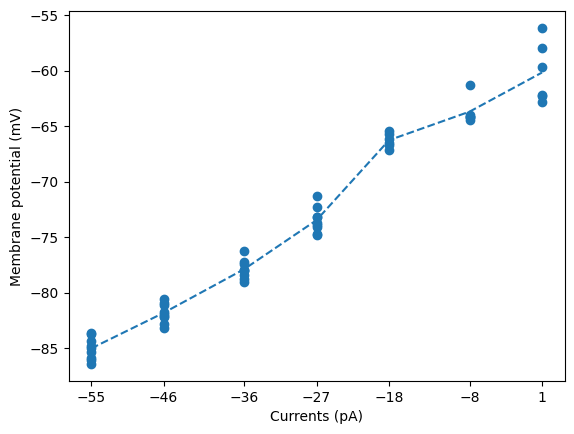

In [61]:
# Part 4:
voltage_list = []
current_list = []
l1_mean_voltage = []

for key in values_VI:
    mean_voltage =  np.mean(values_VI[key])
    l1_mean_voltage.append(mean_voltage)

    for index in range(0,len(values_VI[key])):
        
        voltage_list.append(np.mean(values_VI[key][index]))
        current_list.append((l1_current_value)[int(key)])

plt.figure()
plt.scatter(current_list,voltage_list)
plt.plot(l1_current_value,l1_mean_voltage, '--', color = 'tab:blue')
plt.xlabel('Currents (pA)')
plt.ylabel('Membrane potential (mV)')
plt.xticks(l1_current_value)
plt.show()

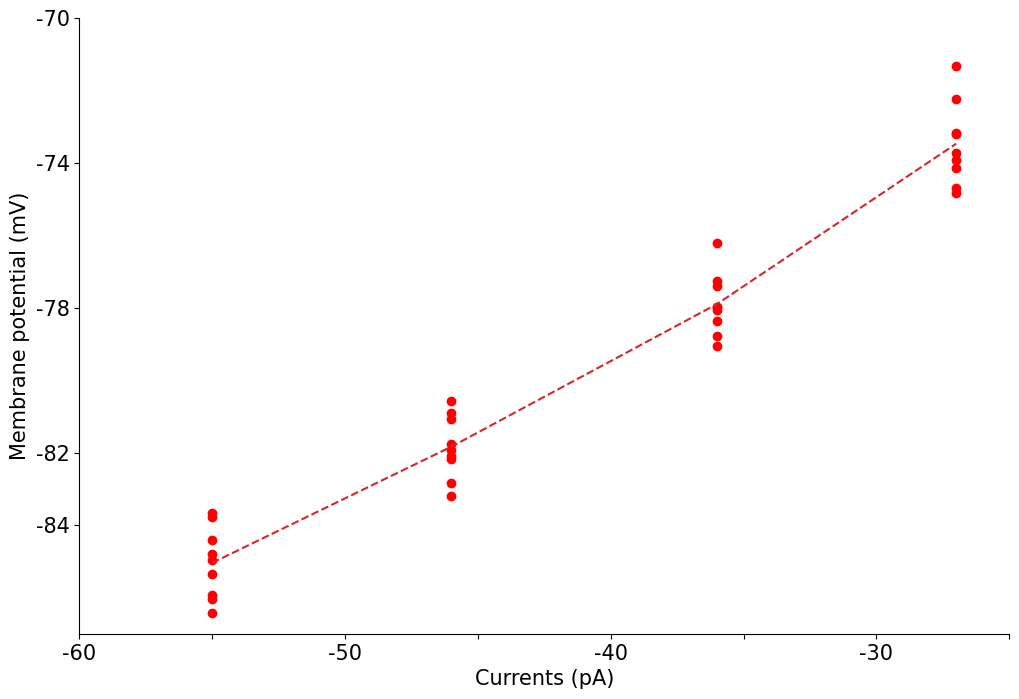

In [64]:
# Part 5:
plt.figure(figsize=(12, 8))
plt.scatter(current_list[:36],voltage_list[:36], color ='r')
plt.plot(l1_current_value[0:4],l1_mean_voltage[0:4], '--', color = 'tab:red')
plt.xlabel('Currents (pA)', size = 15)
plt.ylabel('Membrane potential (mV)', size = 15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_yticks([-84, -82, -78, -74, -70])
plt.gca().set_yticklabels(['-84', '-82', '-78', '-74', '-70'], size = 15)
plt.gca().set_xticks([-60, -55, -50, -45, -40, -35, -30, -25])
plt.gca().set_xticklabels(['-60', '', '-50', '', '-40', '', '-30', ''], size = 15)
plt.ylim(-87,-70)
plt.xlim(-60,-25)

plt.show()

### **Reproducing figure with metadata**

With metadata some step presented above can be skip. Let's have a look. 
The first step was to find current amplitudes values. This step could be very challenging if you don't know how to start and retrieve information as currents. With metadata, you can have a beginning of information that guides you toward figure reproduction. This dataset is quite challenging, therefore, you still need to go through all the membrane potential retrieving steps. However, it is simplifying the process. 

### Retrieving in-depth metadata 

The aim of this part, is to show you why metadata are important for data reuse and how we can use them.\
This part might be scary for some of you. In the future, the in-depth curation team will provide more tutorials to retrieve in-depth metadata. This part is an example of in-depth metadata retrieving. If you want to play around, do. If you don't want, just run the code. 

The objective is to retrieve the current amplitudes. 

In [79]:
import fairgraph.openminds.core as omcore
import fairgraph.openminds.stimulation as omstim
import fairgraph.openminds.ephys as ephys
import json


follow_links = {"has_parts" : {}} # create a short cut with dataset_version and stimulation activity

dataset_version = omcore.DatasetVersion.list(kg_client, digital_identifier__identifier = '10.25493/5GE0-6MF', follow_links = follow_links, suppress_warnings=True)[0]

# Part 1: in-depth metadata retrieving

stimulation_activities = [part for part in dataset_version.has_parts if isinstance(part, omstim.StimulationActivity)] # We get the StimulationActivity instances linked to dataset_version
stimuli = []

for stimulation_activity in stimulation_activities:
# We find every unique EphysStimulus associated with the dataset
    stimulus = stimulation_activity.stimuli.resolve(kg_client)
    if stimulus not in stimuli:
        stimuli.append(stimulus)
# print(stimuli)

specification_json = stimuli[0].specifications.resolve(kg_client).configuration # We retrieve the configuration in JSON format
specification = json.loads(specification_json) # We convert the JSON string into a python dictionary
l1_current_value = specification["amplitudes"]
print(f'current amplitudes: {l1_current_value}')

Property 'protocols' is required but was not provided.
Property 'protocols' is required but was not provided.
Property 'protocols' is required but was not provided.
Property 'protocols' is required but was not provided.
Property 'protocols' is required but was not provided.
Property 'protocols' is required but was not provided.
Property 'protocols' is required but was not provided.
Property 'protocols' is required but was not provided.
Property 'protocols' is required but was not provided.
Property 'protocols' is required but was not provided.
Property 'protocols' is required but was not provided.
Property 'protocols' is required but was not provided.
Property 'protocols' is required but was not provided.
Property 'protocols' is required but was not provided.
Property 'protocols' is required but was not provided.
Property 'protocols' is required but was not provided.
Property 'protocols' is required but was not provided.
Property 'protocols' is required but was not provided.
Property '

current amplitudes: [-55, -46, -36, -27, -18, -8, 1]


You obtained the current amplitudes saved in the KG !\
Now you can re-run all the code above to create the figure. 

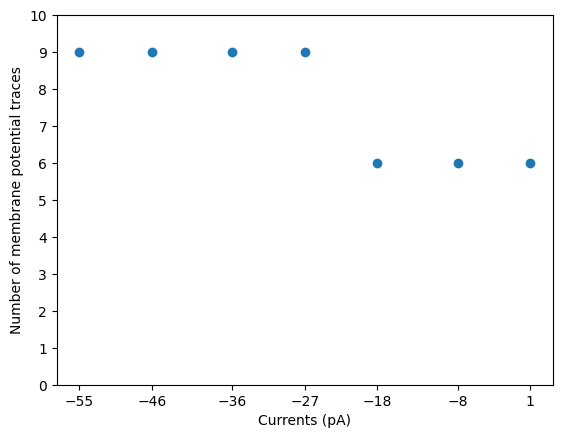

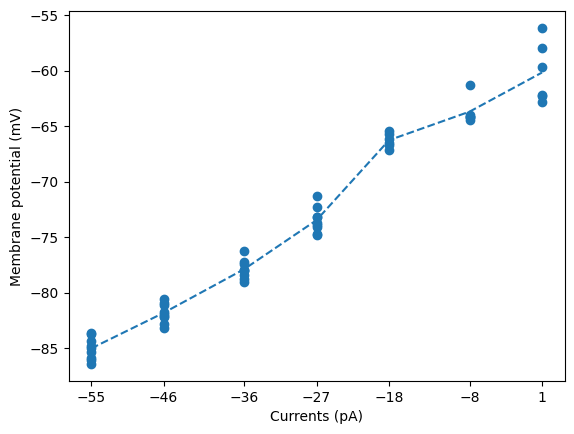

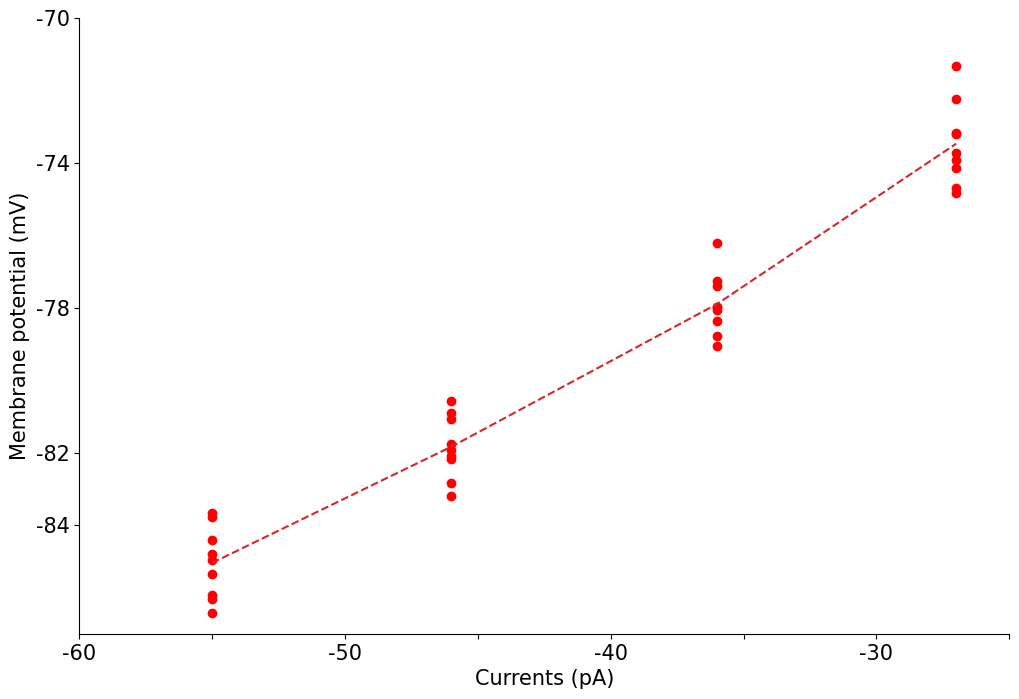

In [76]:
# Part 2:
VI = {}
for index in range(0,len(np.unique(l1_current_value))):
    VI[f'{index}'] =[] 

for rec in repetitions:
    for index in range(0,len(l1_current_value)):
        fullname_current = path + '/' + prefix + '_' + protocol\
        + '_ch' + str(channels['current']) + '_' + str(rec) + '.dat'
        fullname_voltage = path + '/' + prefix + '_' + protocol\
        + '_ch' + str(channels['voltage']) + '_' + str(rec) + '.dat'

        data_current = np.loadtxt(fullname_current)
        time = data_current[:, 0][900:11200]
        current = data_current[:, 1][900:11200]
        
        data_voltage = np.loadtxt(fullname_voltage)
        voltage = data_voltage[:, 1][900:11200]- liquid_junction_potential

        mean = np.mean(current)
        mean_ceil = ceil(mean)
        if mean_ceil == l1_current_value[index]:
            VI[f'{index}'].append(voltage)
            
# Part 3:          
values_VI = {}
for keys in VI.keys():
    values_VI[f'{keys}'] =[]

    for k in range(0,len(VI[keys])):
        values_VI[f'{keys}'].append(VI[keys][k])
        
for i in range(0,len(l1_current_value)):
    plt.scatter(l1_current_value[i], len(values_VI[str(i)]), color='tab:blue')
    plt.ylim(0,10)
    plt.xticks(l1_current_value)
    plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
    plt.xlabel('Currents (pA)')
    plt.ylabel('Number of membrane potential traces')

# Part 4:
voltage_list = []
current_list = []
l1_mean_voltage = []

for key in values_VI:
    mean_voltage =  np.mean(values_VI[key])
    l1_mean_voltage.append(mean_voltage)

    for index in range(0,len(values_VI[key])):
        
        voltage_list.append(np.mean(values_VI[key][index]))
        current_list.append((l1_current_value)[int(key)])

plt.figure()
plt.scatter(current_list,voltage_list)
plt.plot(l1_current_value,l1_mean_voltage, '--', color = 'tab:blue')
plt.xlabel('Currents (pA)')
plt.ylabel('Membrane potential (mV)')
plt.xticks(l1_current_value)
plt.show()

# Part 5:
plt.figure(figsize=(12, 8))
plt.scatter(current_list[:36],voltage_list[:36], color ='r')
plt.plot(l1_current_value[0:4],l1_mean_voltage[0:4], '--', color = 'tab:red')
plt.xlabel('Currents (pA)', size = 15)
plt.ylabel('Membrane potential (mV)', size = 15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_yticks([-84, -82, -78, -74, -70])
plt.gca().set_yticklabels(['-84', '-82', '-78', '-74', '-70'], size = 15)
plt.gca().set_xticks([-60, -55, -50, -45, -40, -35, -30, -25])
plt.gca().set_xticklabels(['-60', '', '-50', '', '-40', '', '-30', ''], size = 15)
plt.ylim(-87,-70)
plt.xlim(-60,-25)

plt.show()

## 3. Conclusion 

This tutorial was made to show how to reuse data with in-depth metadata. You re-engaged knowledge from the Introductory tutorial, learnt how to retrieve in-depth metadata and should be more familiar with metadata and data retrieving. As explained, more tutorial about in-depth metadata will be available soon. This is an introduction to open science tools and concept created in EBRAINS. 